In [ ]:
%%capture
# Instalar dependencias necesarias (solo ejecutar si es necesario)
!pip install numpy matplotlib

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# RED NEURONAL (NN)

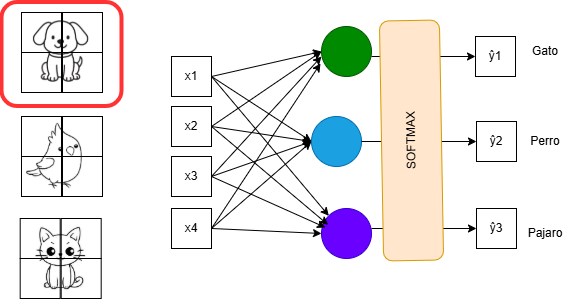

Implementación completa de una red neuronal simple con cálculo de pérdida y actualización de parámetros

In [83]:
# Diccionario para interpretar la predicción
clases = {0: 'gato', 1: 'perro', 2: 'pajaro'}
print(clases)

{0: 'gato', 1: 'perro', 2: 'pajaro'}


## 1. Función Softmax

In [84]:
def Softmax(x):
    exp_x = np.exp(x)
    sum_exp = np.sum(exp_x)
    return exp_x / sum_exp

## 2. Generar datos sintéticos

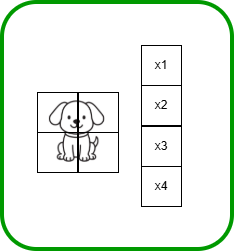

In [85]:
# Generar nuestros cuatro píxeles sintéticos
# Transpuesta para ponerlo como vector columna
x = np.array([[0.1852, 0.0754, 0.437, 0.0619]]).T

# Generar vector y, suponiendo la clases correcta es perro
# Hacer vector columna se aplica la transpuesta usando .T
y = np.array([[0, 1, 0]]).T

print("Entrada x (4 píxeles):")
print(x)
print("\nEtiqueta y (clase correcta: perro):")
print(y)

Entrada x (4 píxeles):
[[0.1852]
 [0.0754]
 [0.437 ]
 [0.0619]]

Etiqueta y (clase correcta: perro):
[[0]
 [1]
 [0]]


## 3. Matriz de pesos e inicialización

In [86]:
# Matriz de pesos sinápticos, con valores aleatorios
# W = np.random.randn(3, 4) * 0.01

# Comentar la línea anterior y descomenta las
# líneas siguientes en caso de querer replicar el
# mismo ejemplo que en el video
W = np.array([[ 0.0032, -0.0266,  0.0006, -0.0097],
              [ 0.0036, -0.0101, -0.0081,  0.0084],
              [-0.0006,  0.005, -0.0065,  0.0265]])

print("Matriz de pesos W:")
print(W)
print(f"Shape: {W.shape}")

Matriz de pesos W:
[[ 0.0032 -0.0266  0.0006 -0.0097]
 [ 0.0036 -0.0101 -0.0081  0.0084]
 [-0.0006  0.005  -0.0065  0.0265]]
Shape: (3, 4)


## 4. Vector de bias

In [87]:
# Vector de biases
b = np.zeros((3,1))

print("Vector de bias b:")
print(b)

Vector de bias b:
[[0.]
 [0.]
 [0.]]


## 5. Forward Pass: Calcular scores

In [88]:
# Calcular scores
z = W@x + b

print("Scores (z = Wx + b):")
print(z)

Scores (z = Wx + b):
[[-0.00175123]
 [-0.00311456]
 [-0.00093427]]


## 6. Calcular predicción con Softmax

In [89]:
# Calcular predicción
y_hat = Softmax(z)
clase_predicha = np.argmax(y_hat)
clase_correcta = np.argmax(y)

print(f"Clase predicha: {clase_predicha} ({clases[clase_predicha]})")
print(f"Clase correcta: {clase_correcta} ({clases[clase_correcta]})")

Clase predicha: 2 (pajaro)
Clase correcta: 1 (perro)


## 7. Calcular pérdida (Cross-Entropy Loss)

In [90]:
# Calcular pérdida para el ejemplo, seleccionar valor donde y = 1
# Obtener Gradientes dz, dW, y db
loss_i = -np.log(y_hat[np.where(y==1)])[0]

print(f"Pérdida (Loss): {loss_i}")

Pérdida (Loss): 1.0997938997298482


## 8. Calcular gradientes

In [91]:
# Obtener Gradientes dz, dW, y db
dz = y_hat - y
dW = dz@x.T
db = dz

print("Gradiente dz (∂L/∂z):")
print(dz)
print("\nGradiente dW (∂L/∂W):")
print(dW)
print("\nGradiente db (∂L/∂b):")
print(db)

Gradiente dz (∂L/∂z):
[[ 0.33339391]
 [-0.6670603 ]
 [ 0.33366639]]

Gradiente dW (∂L/∂W):
[[ 0.06174455  0.0251379   0.14569314  0.02063708]
 [-0.12353957 -0.05029635 -0.29150535 -0.04129103]
 [ 0.06179502  0.02515845  0.14581221  0.02065395]]

Gradiente db (∂L/∂b):
[[ 0.33339391]
 [-0.6670603 ]
 [ 0.33366639]]


## 9. Actualizar parámetros con Gradient Descent

In [98]:
# Actualizar parámetros
learning_rate = 1e-1

W = W - learning_rate*dW
b = b - learning_rate*db

print(f"Learning rate: {learning_rate}")
print("\nMatriz de pesos actualizada:")
print(W)
print("\nVector de bias actualizado:")
print(b)

Learning rate: 0.1

Matriz de pesos actualizada:
[[-0.40746935 -0.19379476 -0.96842001 -0.14695936]
 [ 0.8250534   0.32433621  1.93021067  0.28295705]
 [-0.41138405 -0.16224145 -0.97579066 -0.11079769]]

Vector de bias actualizado:
[[-2.21743709]
 [ 4.43549352]
 [-2.21805643]]


## 10. Verificar cambios después de la actualización

In [93]:
# Calcular nuevos scores con los parámetros actualizados
z_nuevo = W@x + b
y_hat_nuevo = Softmax(z_nuevo)

print(z_nuevo)
print("Nuevos scores:")
print("\nNuevas probabilidades:")
print(y_hat_nuevo)
# Calcular la función de pérdida (cross-entropy) con los nuevos parámetros actualizados
loss_nuevo = -np.log(y_hat_nuevo[y == 1][0])
print(f"Pérdida (Loss) después de la actualización: {loss_nuevo}")

[[-0.00586793]
 [ 0.0051222 ]
 [-0.00505433]]
Nuevos scores:

Nuevas probabilidades:
[[0.33202023]
 [0.3356893 ]
 [0.33229047]]
Pérdida (Loss) después de la actualización: 1.0915692507904482


# 11. Entrenamiento por n iteraciones y gráfica de la pérdida

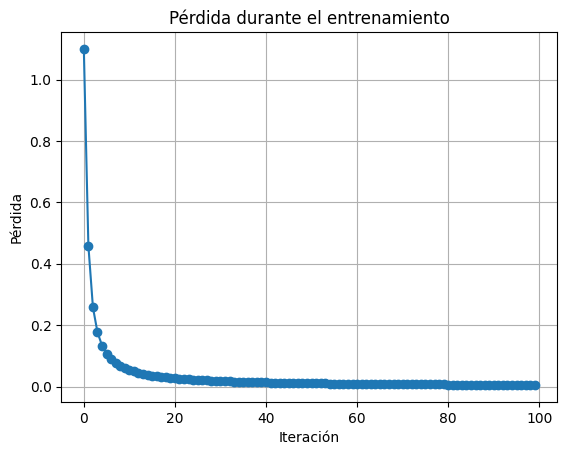

In [100]:
losses = []
W = np.array([[ 0.0032, -0.0266,  0.0006, -0.0097],
              [ 0.0036, -0.0101, -0.0081,  0.0084],
              [-0.0006,  0.005, -0.0065,  0.0265]])
b = np.zeros((3,1))
learning_rate = 1
n = 100

for i in range(n):
    # Forward pass
    z = W @ x + b
    y_hat = Softmax(z)
    # Calcular pérdida
    loss = -np.log(y_hat[y == 1][0])
    losses.append(loss)
    # Gradientes
    dz = y_hat - y
    dW = dz @ x.T
    db = dz
    # Actualizar parámetros
    W = W - learning_rate * dW
    b = b - learning_rate * db

plt.plot(losses, marker='o')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.grid()
plt.show()

In [101]:
# Mostrar la predicción de x con interpretación de clase
z = W @ x + b
y_hat = Softmax(z)
print("Predicción (probabilidades):")
print(y_hat)
clase_predicha = np.argmax(y_hat)
print(f"Clase predicha: {clase_predicha} ({clases[clase_predicha]})")

Predicción (probabilidades):
[[0.00269529]
 [0.99460917]
 [0.00269555]]
Clase predicha: 1 (perro)
